# 규제 선형 모델

- 다항식이 복잡해지면서 회귀 계수값이 크게 설정되고 과대 적합을 유발함
    -> 훈련 데이터에서는 높은 성능을 보이지만, 테스트 데이터에서는 낮은 성능을 보임

- 선형 모델의 목적은 비용 함수를 최소화 하는 것
- 이때, 규제 선형 모델은 비용 함수를 최소화 하는 데에 패널티(alpha)를 적용해 회귀 계수의 크기를 제한함

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Rige 회귀
- L2 규제를 적용한 회귀 모델
- 회귀 계수들의 제곱합에 alhpah 패널치를 곱해 비용 산정에 반영
- alpha 값이 커지면 회귀 계수가 작아짐 -> 과대적합 방지

In [13]:
from sklearn.model_selection import train_test_split

boston_df=pd.read_csv('./data/boston_housing_train.csv')

X=boston_df.drop('MEDV',axis=1)
y=boston_df['MEDV']

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [14]:
from sklearn.linear_model import Ridge
reg=Ridge()

reg.fit(X_train,y_train)

print(reg.score(X_train,y_train),reg.score(X_test,y_test))

print(reg.coef_)

0.7461161787884155 0.678974832784608
[-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]


In [15]:
# reg.alpha

In [16]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score

# 평가지표들
def evauate_regression(y_true,y_pred):
    mse=mean_squared_error(y_true,y_pred)
    rmse=root_mean_squared_error(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
    print(f"'MSE': {mse}, 'RMSE' : {rmse}, 'MAE' : {mae}, 'R2' : {r2}")

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model=Pipeline([
    ('poly',PolynomialFeatures(include_bias=False,degree=2)),
    ('reg',Ridge(alpha=0.01))   # 규제 강도(alpha)가 높아질수록 과대적합에 강해짐
])

model.fit(X_train,y_train)
print(model.score(X_train,y_train),model.score(X_test,y_test))
evauate_regression(y_test,model.predict(X_test))

0.9438738432321337 0.7872498200566541
'MSE': 14.898287413368152, 'RMSE' : 3.8598299720801372, 'MAE' : 2.536591106635486, 'R2' : 0.7872498200566541


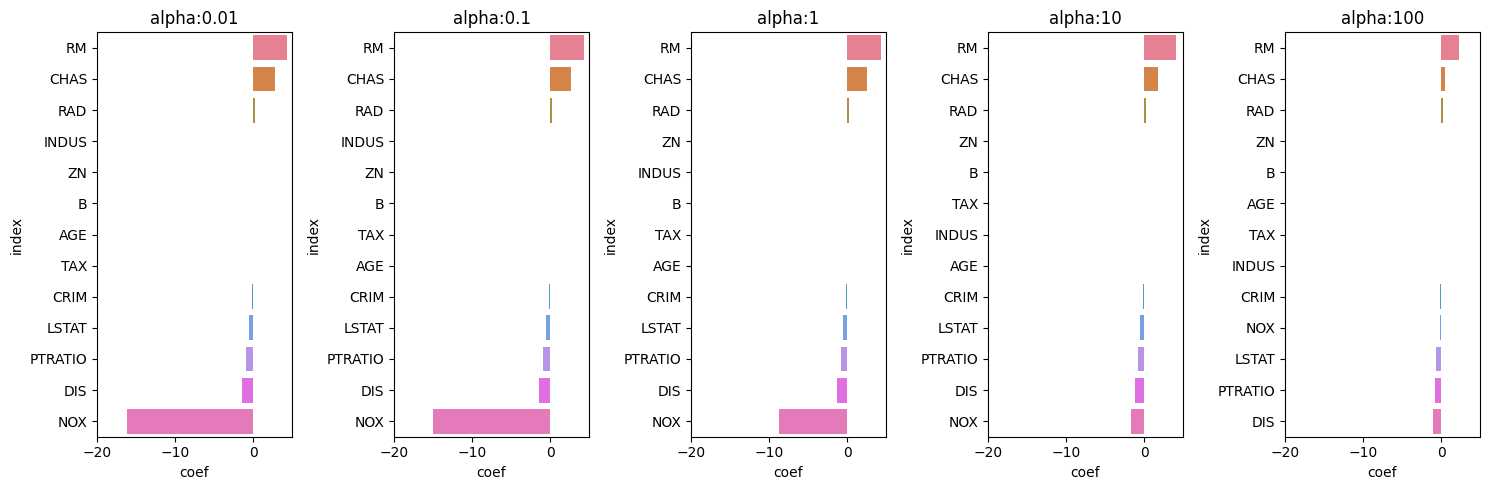

In [30]:
# alpha 값에 따른 시각화

fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(15,5))

alphas=[0.01,0.1,1,10,100]


for i,alpha in enumerate(alphas):
    model=Pipeline([
        # ('poly',PolynomialFeatures(include_bias=False,degree=2)),
        ('reg',Ridge(alpha=alpha))   # 규제 강도(alpha)가 높아질수록 과대적합에 강해짐
    ])

    model.fit(X_train,y_train)

    coef=model.named_steps['reg'].coef_
    coef_ser=pd.Series(coef,index=X.columns)
    coef_ser.name='alpha:'+str(alpha)
    coef_ser=coef_ser.sort_values(ascending=False)

    ax[i].set_title(coef_ser.name)
    ax[i].set_xlabel('coef')
    ax[i].set_ylabel('index')
    ax[i].set_xlim(-20,5)
    sns.barplot(x=coef_ser.values,y=coef_ser.index,ax=ax[i],hue=coef_ser.index)

plt.tight_layout()
plt.show()    

### Lasso 회귀
- L1 규제를 적용한 선형 회귀 모델
- 회귀 계수 절대값의 합을 alpha 값과 곱해 규제 정도 지정
- alpha 값이 커지면 규제 정도가 커짐
- 회귀 계수를 0까지 줄일 수 있음 = 해당 특성을 아예 반영하지 않도록 함 = 특성 선택 효과가 있음

In [32]:
from sklearn.linear_model import Lasso

reg=Lasso(alpha=10)

reg.fit(X_train,y_train)

print(reg.score(X_train,y_train),reg.score(X_test,y_test))

print(reg.coef_)

0.5373948270602298 0.49459972513091244
[-0.          0.00806625 -0.          0.          0.          0.
  0.         -0.          0.         -0.00896833 -0.          0.01014021
 -0.62986968]


### ElasticNet 회귀
- L1, L2 규제를 함께 적용할 수 있는 회귀 모델

**하이퍼 파라미터**
- alpha: 규제정도 (L1,L2)
- l1_ratio: alpha 값 중 L1 규제의 비율

In [35]:
from sklearn.linear_model import ElasticNet

reg=ElasticNet(alpha=1,l1_ratio=0.2) # reg.alpha 기본값: 1, reg.l1_ratio 기본값: 0.5

# reg.alpha, reg.l1_ratio

reg.fit(X_train,y_train)

print(reg.score(X_train,y_train),reg.score(X_test,y_test))

print(reg.coef_)

0.6914758177681419 0.6584782663638298
[-0.11304195  0.03616532 -0.02567739  0.01331622 -0.          1.08071656
  0.01537004 -0.76232832  0.28676237 -0.01396857 -0.76004478  0.01203943
 -0.78366959]


In [42]:
from sklearn.pipeline import Pipeline

model=Pipeline([
    # (이름, 객체)
    ('poly',PolynomialFeatures(include_bias=False,degree=3)),
    ('reg',ElasticNet(alpha=1000,l1_ratio=.6))
])

model.fit(X_train,y_train)
print(model.score(X_train,y_train),model.score(X_test,y_test))
evauate_regression(y_test,model.predict(X_test))

0.9060674214369663 0.8043998276786495
'MSE': 13.697321365950557, 'RMSE' : 3.7009892415340198, 'MAE' : 2.399980366257378, 'R2' : 0.8043998276786495


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.932e+03, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
